# Introduction

In my work, I frequently encounter datasets that are solely presented through statistical descriptions, such as sample size, mean, standard deviation, maximum, and minimum values. These limitations restrict the possibilities of data utilization, comparisons with other samples, and visualizations. In this project, I present my attempt to reconstruct numerical data samples from such statistical descriptions by generating random values assuming a normal distribution of the data. The goal is to approximate the original dataset and gain valuable insights despite the limited information available.

The method proposed here can be called a "**simulation-based method for reconstructing a sample of numerical data assuming a normal distribution**". This method utilizes random number generation from a standard normal distribution and then applies transformations to match the desired mean, standard deviation, maximum, and minimum values.

By simulating random numbers and adjusting their characteristics, this method approximates a sample that follows a normal distribution with the specified parameters. The reconstructed sample is an approximation and may not precisely represent the original data that generated the provided summary statistics.

The set of data used in this study represents measurements of reindeer talus from several Paleolithic sites of France (**Kuntz, D., 2011**. Ostéométrie et migration(s) du renne (*Rangifer tarandus*) dans le Sud-Ouest de la France au cours du dernier Pléniglaciaire et du Tardiglaciaire (21 500-13 000 cal. BP) (Doctoral dissertation, Université Toulouse le Mirail-Toulouse II)).

# Simulation-based method for reconstructing a sample of numerical data 
### Import of libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [5]:
from sklearn.linear_model import LinearRegression

### Importing the data and adapting it to facilitate the work

In [6]:
sample = pd.read_excel('rangifer_france.xlsx', sheet_name = 'Sheet1')

In [7]:
print(sample.isnull().sum())

Assemblage     0
H lat          0
H med          0
DAP lat        0
DAP med       11
DLM dist      21
dtype: int64


In [8]:
sample.head()

,Assemblage,H lat,H med,DAP lat,DAP med,DLM dist
0,Siréjol,40.9,39.4,22.6,25.6,25.5
1,Siréjol,44.1,42.0,25.0,25.9,26.3
2,Siréjol,46.0,43.1,25.7,26.6,27.1
3,Siréjol,42.5,40.0,23.2,24.8,25.4
4,Siréjol,48.5,45.0,27.1,28.1,29.7


In [9]:
sample = sample.rename(columns={'H lat': 'H_lat', 'H med': 'H_med', 'DAP lat': 'DAP_lat', 'DAP med': 'DAP_med', 'DLM dist': 'DLM_dist'})

### Imputation of missing data
To visualize missing data in the dataset, I use the library **missingno**.

<AxesSubplot:>

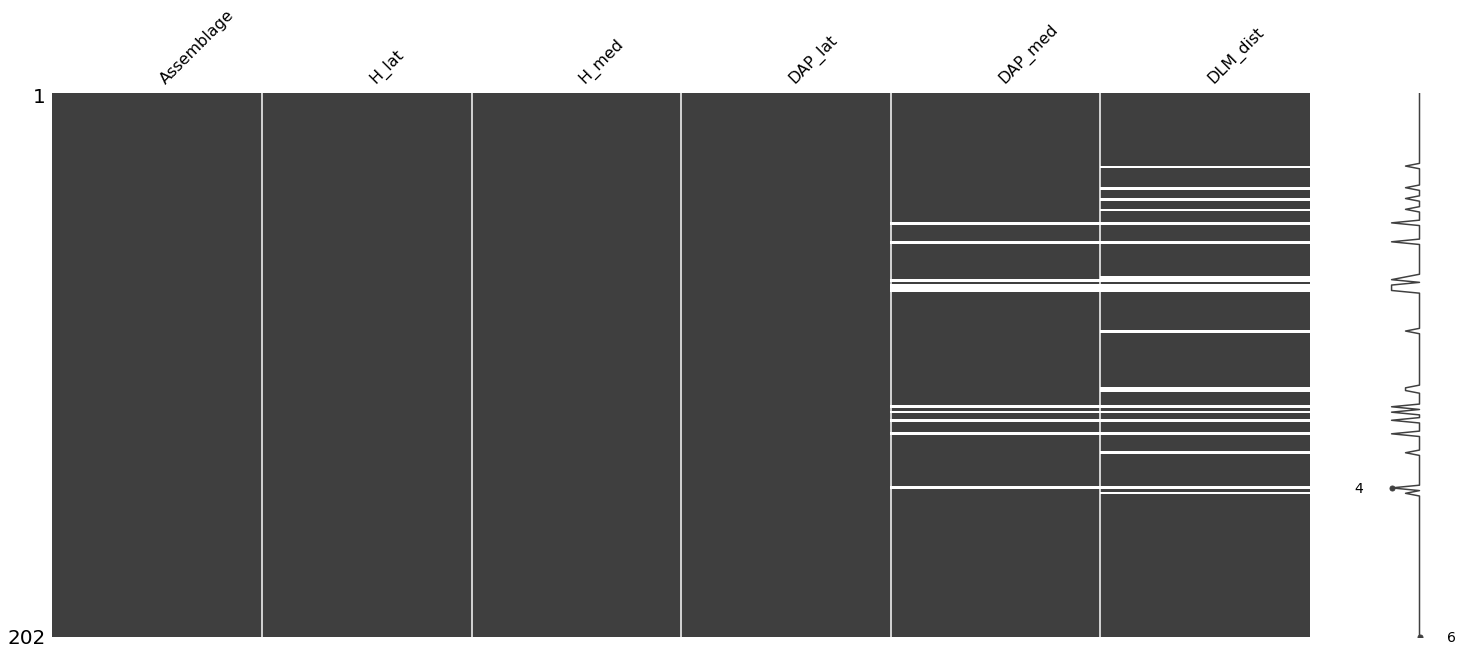

In [10]:
msno.matrix(sample)

#### The dataset used in this work is incomplete. We will perform data imputation using multiple linear regression for each of parameter that requires imputation:

In [11]:
complete_sample = sample[(sample['DAP_med'].notna()) & (sample['DLM_dist'].notna())].reset_index(drop=True)

In [12]:
complete_DAP_med =  sample[sample['DAP_med'].notna()].reset_index(drop=True)

In [13]:
incomplete_DAP_med = sample[sample['DAP_med'].isnull()].reset_index(drop=True)

In [14]:
complete_DLM_dist = sample[sample['DLM_dist'].notna()].reset_index(drop=True)

In [15]:
incomplete_DLM_dist = sample[sample['DLM_dist'].isnull()].reset_index(drop=True)

In [16]:
regr_mult_1= smf.ols('DAP_med~H_lat+H_med+DAP_lat', data=complete_DAP_med).fit()

In [17]:
print(regr_mult_1.summary())

                            OLS Regression Results                            
Dep. Variable:                DAP_med   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     161.1
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           1.35e-51
Time:                        11:16:45   Log-Likelihood:                -234.36
No. Observations:                 191   AIC:                             476.7
Df Residuals:                     187   BIC:                             489.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5026      1.224     -0.410      0.6

In [18]:
complete_DAP_med['residu_s'] = regr_mult_1.resid

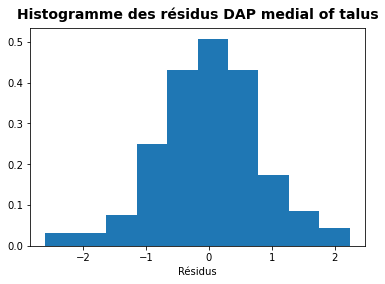

In [19]:
plt.hist(complete_DAP_med['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus DAP medial of talus', fontsize = 14, pad = 10, fontweight="bold")
plt.show()

In [20]:
regr_mult_2= smf.ols('DLM_dist~H_lat+H_med+DAP_lat', data=complete_DLM_dist).fit()

In [21]:
print(regr_mult_2.summary())

                            OLS Regression Results                            
Dep. Variable:               DLM_dist   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     102.2
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           2.01e-38
Time:                        11:16:48   Log-Likelihood:                -252.42
No. Observations:                 181   AIC:                             512.8
Df Residuals:                     177   BIC:                             525.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9024      1.543      0.585      0.5

In [22]:
complete_DLM_dist['residu_s'] = regr_mult_2.resid

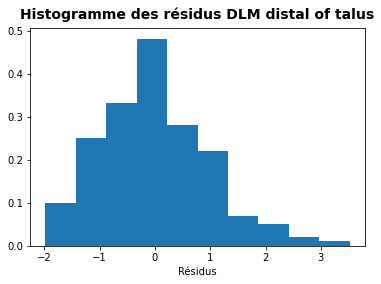

In [23]:
plt.hist(complete_DLM_dist['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus DLM distal of talus', fontsize = 14, pad = 10, fontweight="bold")
plt.show()

In [24]:
predicting_DAP_med = regr_mult_1.predict(incomplete_DAP_med)

In [25]:
predicting_DAP_med

0     25.003600
1     30.117811
2     28.391855
3     27.666079
4     29.542224
5     25.644291
6     26.723701
7     30.556909
8     29.054064
9     25.181553
10    26.849010
dtype: float64

In [26]:
predicting_DLM_dist = regr_mult_2.predict(incomplete_DLM_dist)

In [27]:
predicting_DLM_dist

0     27.639053
1     28.155943
2     28.046660
3     26.504440
4     22.262073
5     26.856302
6     23.277151
7     24.254683
8     24.199775
9     25.419123
10    23.097517
11    26.815356
12    27.189430
13    26.939068
14    23.713547
15    26.610147
16    25.744067
17    23.097996
18    29.311765
19    25.147989
20    26.639675
dtype: float64

In [28]:
incomplete_DAP_med['DAP_med'] = round(predicting_DAP_med, 1)

In [29]:
incomplete_DLM_dist['DLM_dist'] = round(predicting_DLM_dist, 1)

In [30]:
completed_sample = complete_sample.append(incomplete_DAP_med, ignore_index=True)

In [31]:
completed_sample = completed_sample.append(incomplete_DLM_dist, ignore_index=True)

In [32]:
completed_sample.head()

,Assemblage,H_lat,H_med,DAP_lat,DAP_med,DLM_dist
0,Siréjol,40.9,39.4,22.6,25.6,25.5
1,Siréjol,44.1,42.0,25.0,25.9,26.3
2,Siréjol,46.0,43.1,25.7,26.6,27.1
3,Siréjol,42.5,40.0,23.2,24.8,25.4
4,Siréjol,48.5,45.0,27.1,28.1,29.7


<AxesSubplot:>

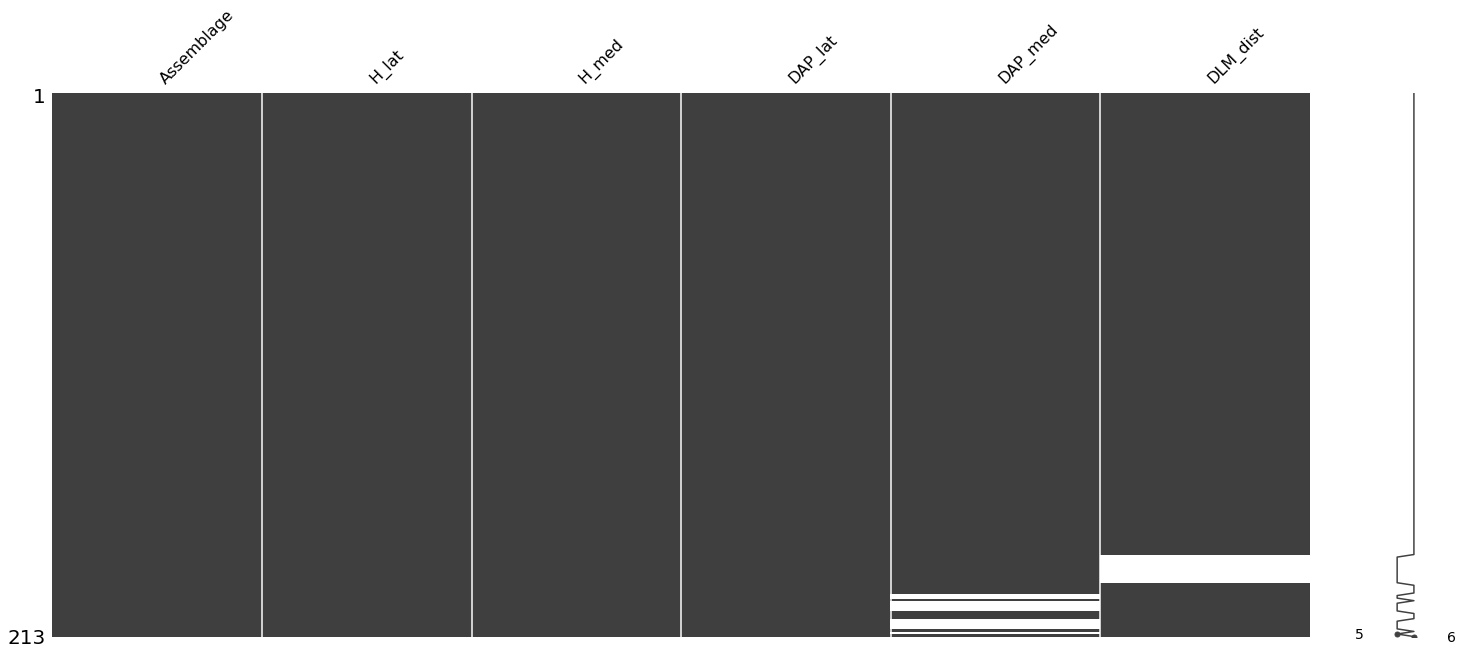

In [33]:
msno.matrix(completed_sample)

#### Due to missing values in some individuals for both variables, the imputation process results in duplicates, with one missing value and one imputed value. To handle this, we will perform a group-by operation on all initially complete values (since the ID of individuals is missing) and use aggregation to select the first available value from the duplicates. This process effectively removes the duplicates while retaining the most relevant data.

In [34]:
completed_sample = completed_sample.groupby(['Assemblage', 'H_lat', 'H_med', 'DAP_lat'], as_index=False).agg('first')

<AxesSubplot:>

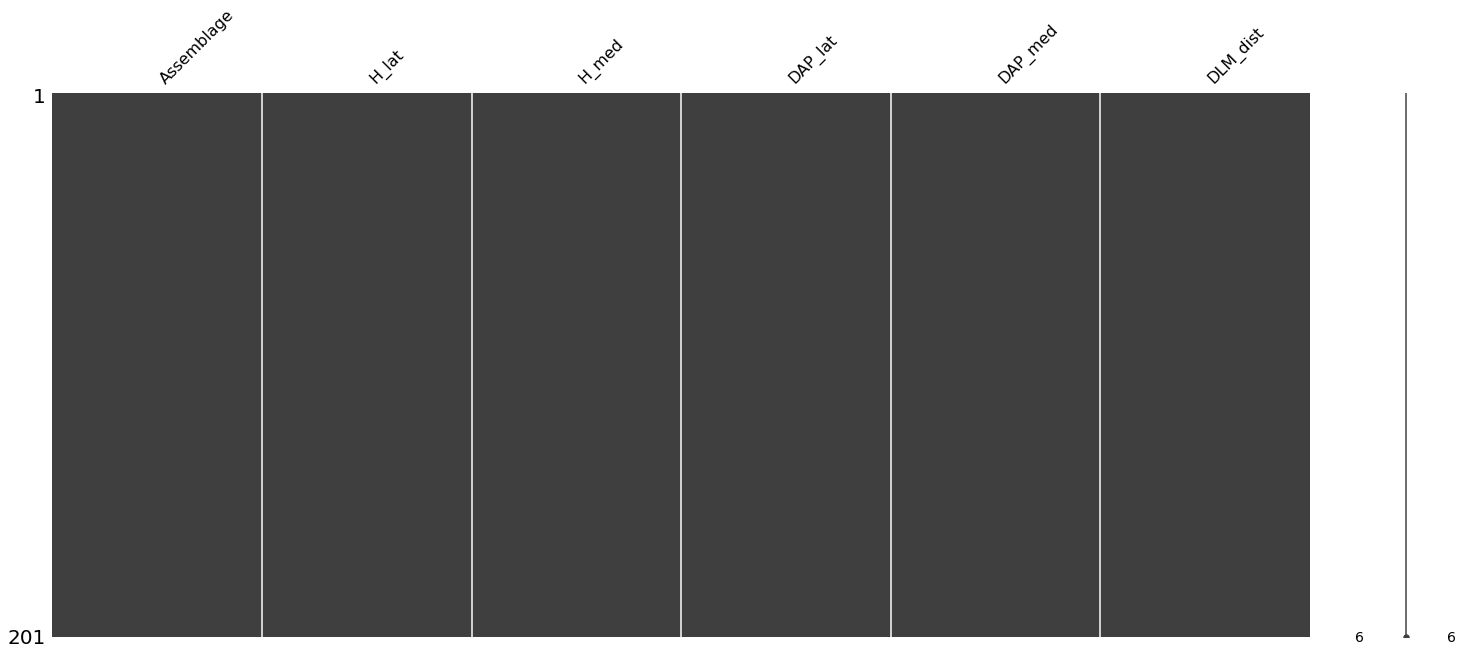

In [35]:
msno.matrix(completed_sample)

## Statistical description of the initial data

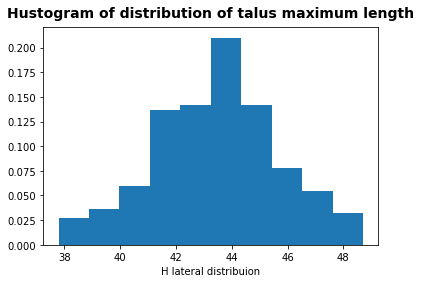

In [36]:
plt.hist(completed_sample['H_lat'], density=True)
plt.xlabel('H lateral distribuion')
plt.title('Hustogram of distribution of talus maximum length', fontsize = 14, pad = 10, fontweight="bold")
plt.show()


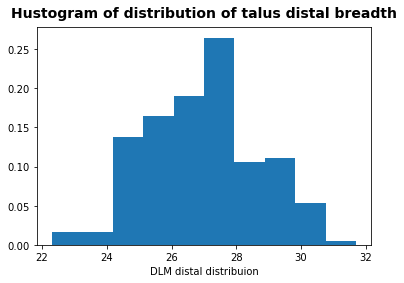

In [37]:
plt.hist(completed_sample['DLM_dist'], density=True)
plt.xlabel('DLM distal distribuion')
plt.title('Hustogram of distribution of talus distal breadth', fontsize = 14, pad = 10, fontweight="bold")
plt.show()

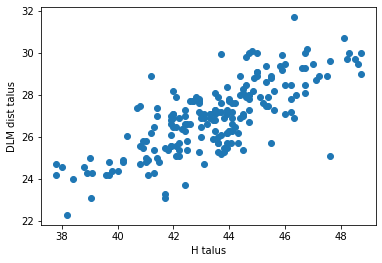

In [38]:
x=completed_sample['H_lat']
y=completed_sample['DLM_dist']
plt.scatter(x, y)
plt.xlabel('H talus')
plt.ylabel('DLM dist talus')
plt.show()

In [39]:
n = len(completed_sample)
mean = round(completed_sample['H_lat'].mean(), 2)
st_dev = round(completed_sample['H_lat'].std(), 2)
min_value = completed_sample['H_lat'].min()
max_value = completed_sample['H_lat'].max()

In [40]:
print("n = ", n, "; mean = ", mean, "; standard deviation = ", st_dev, "; maximum value = ", max_value, "; minimum value", min_value)

n =  201 ; mean =  43.45 ; standard deviation =  2.27 ; maximum value =  48.7 ; minimum value 37.8


In [41]:
n = len(completed_sample)
mean_dlm = round(completed_sample['DLM_dist'].mean(), 2)
st_dev_dlm = round(completed_sample['DLM_dist'].std(), 2)
min_dlm = completed_sample['DLM_dist'].min()
max_dlm = completed_sample['DLM_dist'].max()

In [42]:
print("n = ", n, "; mean = ", mean_dlm, "; standard deviation = ", st_dev_dlm, "; maximum value = ", max_dlm, "; minimum value", min_dlm)

n =  201 ; mean =  26.94 ; standard deviation =  1.7 ; maximum value =  31.7 ; minimum value 22.3


### Adapting the reconstructed data for bivariate plotting purposes.

The majority of the data will be sorted from smallest to largest values to capture the general correlation trend. A smaller portion of the data will remain unsorted to retain data dispersion.

Here, I attempted to use the standard deviation to capture the dispersion of the reconstructed data (sorted_ratio), but my efforts were unsuccessful. As an alternative, the proposed value of the sorted ratio is derived from the linear equation of the reconstructed data scatter plot, which is adjusted to closely match the linear equation of the original data. This adjustment ensures that the reconstructed data aligns with the linear relationship observed in the original dataset.

In [43]:
# the regression line is too steep:
#sorted_ratio = 1-(((st_dev/(max_value - min_value)) + (st_dev_dlm/(max_dlm - min_dlm)))/2)
# the regression line is not enoigh steep:
#sorted_ratio = 1-((st_dev/(max_value - min_value)) + (st_dev_dlm/(max_dlm - min_dlm)))
# the proposed value of sorted ratio is fitted based on the linear equation of the recovered data scatter plot,
# which is closest to the linear equation of the original data.
sorted_ratio = 0.65

In [44]:
print(sorted_ratio)

0.65


### Simulation-based method for reconstructing a sample of numerical data assuming a normal distribution

In [45]:
def reconstruct_sample(mean, st_dev, max_value, min_value, n):
    # Generate random numbers from a standard normal distribution
    sample_r = np.random.randn(n)
    
    # Rescale and transform the sample to match the desired mean and standard deviation
    sample_r = sample_r * st_dev + mean
    
    # Adjust the range of the sample to fit within the specified maximum and minimum values
    sample_range = max_value - min_value
    sample_r = (sample_r - np.min(sample_r)) / (np.max(sample_r) - np.min(sample_r))
    sample_r = sample_r * sample_range + min_value
    
    return sample_r

**COMMENT**: In this code, the **reconstruct_sample** function takes the *mean*, *standard deviation*, *maximum*, *minimum*, and number of individuals as input parameters. It generates a sample of random numbers from a standard normal distribution using np.random.randn. Then, it rescales and transforms the sample to match the desired mean and standard deviation. Finally, it adjusts the range of the sample to fit within the specified maximum and minimum values.
The reconstructed sample is returned by the function and can be stored in the reconstructed_sample variable.

In this code, **np.random.randn(num_individuals)** generates num_individuals random numbers from a standard normal distribution, where the mean is 0 and the standard deviation is 1. These random values are then rescaled and transformed to match the desired mean and standard deviation specified in the function arguments: **sample_r = sample_r * std_dev + mean**. By multiplying each random value by the standard deviation and adding the mean, the sample is transformed to have the desired mean (mean) and standard deviation (std_dev).

This part of the code ensures that the generated sample follows an approximately normal distribution with the desired mean and standard deviation, assuming the original data follows a normal distribution with the provided statistics.


#### Here we obtain reconstructed sample (length of talus) using the created function:

In [46]:
reconstructed_sample = reconstruct_sample(mean, st_dev, max_value, min_value, n)

#### To build a skatter plot of the reconstructed sample, we divide the sample into sorted data to obtain a general correlation trend of the sample, and unsorted data to obtain the dispersion of data similar to that of original sample:

In [47]:
# Determine the number of elements to be sorted
num_sorted = int(n * sorted_ratio)

# Sort the selected elements
sorted_values_H = np.sort(reconstructed_sample[:num_sorted])

# Keep the remaining elements unsorted
unsorted_values_H = reconstructed_sample[num_sorted:]

# Combine the sorted and unsorted values
mixed_values_H = np.concatenate((sorted_values_H, unsorted_values_H))

print(mixed_values_H)

[37.8        37.92234317 38.08560355 38.49816394 38.60831031 38.68356378
 38.90030441 38.9420241  39.41431168 39.76377206 39.80500514 39.92755773
 40.11199698 40.16407224 40.22333278 40.22984578 40.45973705 40.55240425
 40.56926482 40.60584652 40.64961487 40.69632172 40.71503564 40.85201438
 40.86118331 41.11190007 41.17899013 41.21966776 41.26853628 41.2716517
 41.2913623  41.43798357 41.44657821 41.46624772 41.49507126 41.52373595
 41.53744441 41.65052157 41.68109018 41.74432661 41.74695363 41.84114923
 41.84986818 41.86381622 41.88632984 41.92426128 41.97198689 42.04360044
 42.06228974 42.09119005 42.09481641 42.15836736 42.15870535 42.2485243
 42.2599025  42.33882502 42.36028649 42.37778561 42.44168781 42.49193916
 42.49300326 42.54854506 42.6036751  42.63194908 42.69936512 42.7501366
 42.78103423 42.78593558 42.78810825 42.84364677 42.87625425 42.87761966
 42.90021942 42.90139035 43.00700109 43.03449061 43.03796411 43.13119219
 43.13642275 43.13945663 43.23781894 43.24823794 43.29

#### Here we build the histogram plots of original data and reconstructed data to compate the distribution of the simulated data with real data (maximum length of talus):

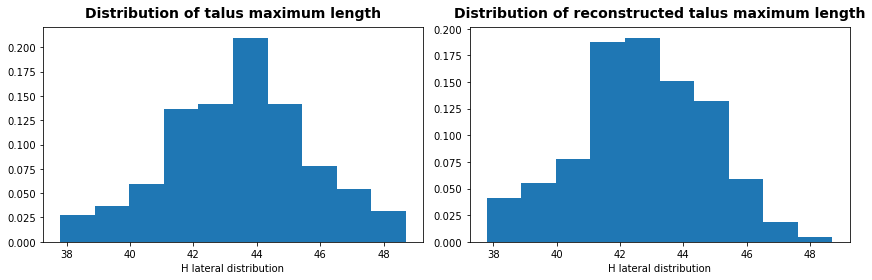

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Original Data
axes[0].hist(completed_sample['H_lat'], density=True)
axes[0].set_xlabel('H lateral distribution')
axes[0].set_title('Distribution of talus maximum length', fontsize=14, pad=10, fontweight="bold")

# Plot 2: Reconstructed Data
axes[1].hist(mixed_values_H, density=True)
axes[1].set_xlabel('H lateral distribution')
axes[1].set_title('Distribution of reconstructed talus maximum length', fontsize=14, pad=10, fontweight="bold")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


#### Box plot is another way to compare the distribution of the simulated data with real data:

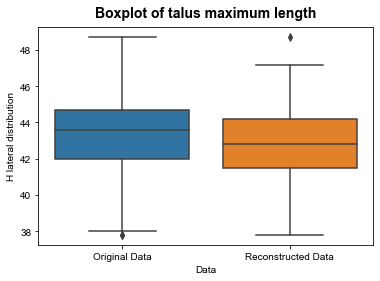

In [49]:
# Data
data = [completed_sample['H_lat'], mixed_values_H]

# Boxplot with Seaborn
ax = sns.boxplot(data=data)
sns.set(style="ticks")
ax.set_xticklabels(['Original Data', 'Reconstructed Data'])
plt.xlabel('Data')
plt.ylabel('H lateral distribution')
plt.title('Boxplot of talus maximum length', fontsize=14, pad=10, fontweight="bold")

plt.show()

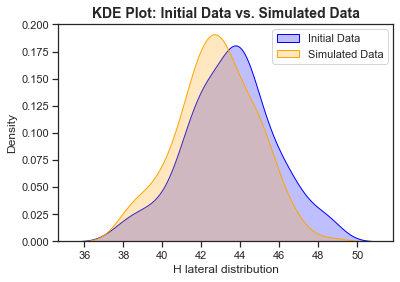

In [63]:
# another way to compare the data distribution
sns.kdeplot(data=completed_sample['H_lat'], label='Initial Data', color='blue', shade=True)
sns.kdeplot(data=mixed_values_H, label='Simulated Data', color='orange', shade=True)

# Set plot labels and title
plt.xlabel('H lateral distribution')
plt.ylabel('Density')
plt.title('KDE Plot: Initial Data vs. Simulated Data', fontsize=14, fontweight='bold')

plt.legend()
plt.show()

### Here, we obtain the reconstructed values of distal breadth of talus based on the descriptive statistical parameters:

In [51]:
reconstructed_dlm_dist = reconstruct_sample(mean_dlm, st_dev_dlm, max_dlm, min_dlm, n)

In [52]:
# Sort the selected elements
sorted_values_DLM = np.sort(reconstructed_dlm_dist[:num_sorted])

# Keep the remaining elements unsorted
unsorted_values_DLM = reconstructed_dlm_dist[num_sorted:]

# Combine the sorted and unsorted values
mixed_values_DLM = np.concatenate((sorted_values_DLM, unsorted_values_DLM))

print(mixed_values_DLM)

[22.55014942 22.60779083 22.78026037 22.78273697 23.00795604 23.08693354
 23.18624367 23.25215789 23.31455636 23.46326605 23.54977356 23.85205795
 23.91336038 24.24402457 24.32580825 24.36574572 24.49113972 24.55813652
 24.62082438 24.79153036 24.82295478 24.83782508 24.84038919 24.85280301
 24.89716043 24.90385022 24.94450234 24.95799545 25.00331362 25.06179035
 25.09069462 25.15017169 25.2203924  25.23417962 25.25941946 25.31371977
 25.31533606 25.31814397 25.36212337 25.36971753 25.38261779 25.40889545
 25.44582027 25.452895   25.47676587 25.48020065 25.54055355 25.64768487
 25.66977369 25.67903908 25.7213242  25.81367445 25.81685352 25.83615235
 25.85472165 25.86370783 25.88195198 25.95252598 25.96776372 26.01033777
 26.03176077 26.0464163  26.05704965 26.1470785  26.15245394 26.16124884
 26.1979827  26.21187168 26.25858013 26.28662171 26.33029267 26.3346936
 26.36643974 26.45707434 26.45838768 26.46806357 26.48838311 26.50838262
 26.51663936 26.51674288 26.54329974 26.62561877 26.

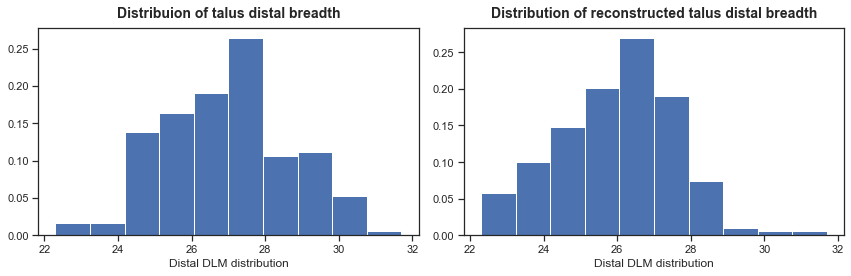

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Original Data
axes[0].hist(completed_sample['DLM_dist'], density=True)
axes[0].set_xlabel('Distal DLM distribution')
axes[0].set_title('Distribuion of talus distal breadth', fontsize=14, pad=10, fontweight="bold")

# Plot 2: Reconstructed Data
axes[1].hist(mixed_values_DLM, density=True)
axes[1].set_xlabel('Distal DLM distribution')
axes[1].set_title('Distribution of reconstructed talus distal breadth', fontsize=14, pad=10, fontweight="bold")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

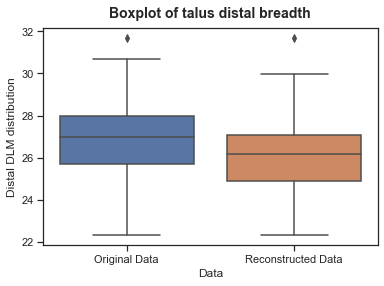

In [54]:
# Data
data = [completed_sample['DLM_dist'], mixed_values_DLM]

# Boxplot with Seaborn
ax = sns.boxplot(data=data)
sns.set(style="ticks")
ax.set_xticklabels(['Original Data', 'Reconstructed Data'])
plt.xlabel('Data')
plt.ylabel('Distal DLM distribution')
plt.title('Boxplot of talus distal breadth', fontsize=14, pad=10, fontweight="bold")

plt.show()

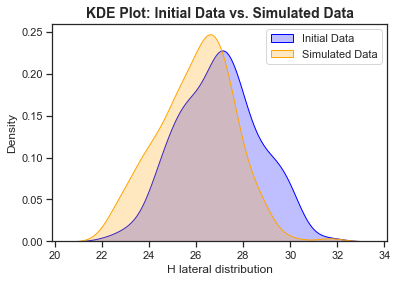

In [64]:
# kde plot to compare the data distribution
sns.kdeplot(data=completed_sample['DLM_dist'], label='Initial Data', color='blue', shade=True)
sns.kdeplot(data=mixed_values_DLM, label='Simulated Data', color='orange', shade=True)

plt.xlabel('H lateral distribution')
plt.ylabel('Density')
plt.title('KDE Plot: Initial Data vs. Simulated Data', fontsize=14, fontweight='bold')

plt.legend()
plt.show()

### Here, we complare the bivariate skatter plots of original data and reconsctucted data:

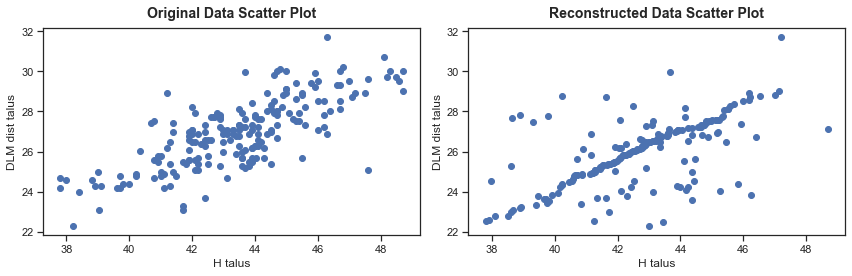

In [55]:
# Data for Original Scatter Plot
x_original = completed_sample['H_lat']
y_original = completed_sample['DLM_dist']

# Data for Reconstructed Scatter Plot
x_reconstructed = mixed_values_H
y_reconstructed = mixed_values_DLM

# Create Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Original Scatter Plot
axes[0].scatter(x_original, y_original)
axes[0].set_xlabel('H talus')
axes[0].set_ylabel('DLM dist talus')
axes[0].set_title('Original Data Scatter Plot', fontsize=14, pad=10, fontweight='bold')

# Reconstructed Scatter Plot
axes[1].scatter(x_reconstructed, y_reconstructed)
axes[1].set_xlabel('H talus')
axes[1].set_ylabel('DLM dist talus')
axes[1].set_title('Reconstructed Data Scatter Plot', fontsize=14, pad=10, fontweight='bold')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [56]:
x=completed_sample['H_lat'].values.reshape(-1, 1)
y=completed_sample['DLM_dist'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Get the model coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Print the linear regression formula
print(f"y = {slope:.2f}x + {intercept:.2f}")


y = 0.57x + 2.21


In [57]:
x=mixed_values_H.reshape(-1, 1)
y=mixed_values_DLM

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Get the model coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Print the linear regression formula
print(f"y = {slope:.2f}x + {intercept:.2f}")

y = 0.49x + 4.96


### Here, we compare linear regressions of original and reconstructed data:

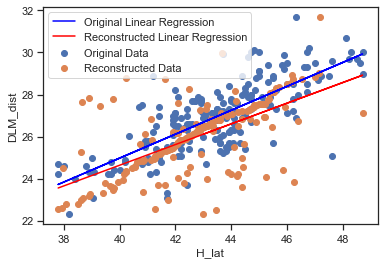

In [58]:
# Original data
x_original = completed_sample['H_lat'].values.reshape(-1, 1)
y_original = completed_sample['DLM_dist'].values

# Reconstructed data
x_reconstructed = mixed_values_H.reshape(-1, 1)
y_reconstructed = mixed_values_DLM

# Create and fit the linear regression models
model_original = LinearRegression()
model_original.fit(x_original, y_original)

model_reconstructed = LinearRegression()
model_reconstructed.fit(x_reconstructed, y_reconstructed)

# Predictions
y_pred_original = model_original.predict(x_original)
y_pred_reconstructed = model_reconstructed.predict(x_reconstructed)

# Plotting the original and reconstructed data with linear regressions
plt.scatter(x_original, y_original, label='Original Data')
plt.plot(x_original, y_pred_original, color='blue', label='Original Linear Regression')

plt.scatter(x_reconstructed, y_reconstructed, label='Reconstructed Data')
plt.plot(x_reconstructed, y_pred_reconstructed, color='red', label='Reconstructed Linear Regression')

plt.xlabel('H_lat')
plt.ylabel('DLM_dist')
plt.legend()
#plt.savefig("talus_regression5.jpg", bbox_inches='tight')
plt.show()


In [60]:
# Assuming you have the reconstructed data stored in the variable 'reconstructed_sample'
mean_reconstructed = np.mean(reconstructed_sample)
std_dev_reconstructed = np.std(reconstructed_sample)
max_reconstructed = np.max(reconstructed_sample)
min_reconstructed = np.min(reconstructed_sample)

print(f"Mean of the reconstructed data: {mean_reconstructed:.2f}")
print(f"Standard deviation of the reconstructed data: {std_dev_reconstructed:.2f}")
print(f"Maximum value of the reconstructed data: {max_reconstructed:.2f}")
print(f"Minimum value of the reconstructed data: {min_reconstructed:.2f}")

Mean of the reconstructed data: 42.73
Standard deviation of the reconstructed data: 2.06
Maximum value of the reconstructed data: 48.70
Minimum value of the reconstructed data: 37.80


In [61]:
# Here are the statistical characteristics of the initial data for comparison:
print("n = ", n, "; mean = ", mean, "; standard deviation = ", st_dev, "; maximum value = ", max_value, "; minimum value", min_value)

n =  201 ; mean =  43.45 ; standard deviation =  2.27 ; maximum value =  48.7 ; minimum value 37.8


We can see that the obtained statistical characteristics (mean and standard deviation) are close to those of the initial data, but not identical with them.

# Conclusion
The reconstruction of data based on descriptive statistics parameters provides an approximate representation of the initial data used for this exercise. However, it's important to acknowledge that the randomly generated reconstructed data may differ from the original data in terms of their distribution. Nevertheless, we must consider that the individuals in the initial data also possess inherent randomness. Consequently, we are comparing two datasets of random nature, which exhibit similar statistical characteristics. When interpreting the results, it is essential to recognize the limitations of the reconstruction process and the inherent variability in both datasets.